('Temperature: ', 1)


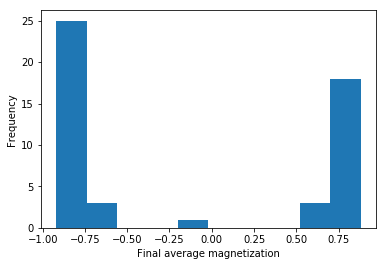

('Temperature: ', 2)


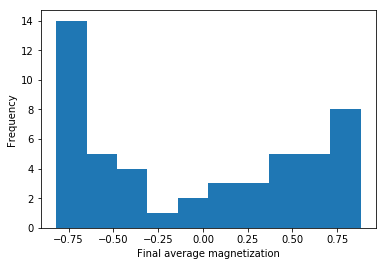

('Temperature: ', 3)


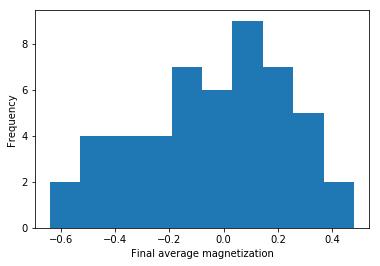

('Temperature: ', 4)


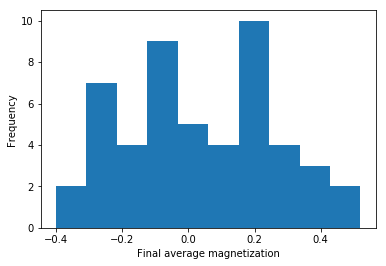

In [32]:

import matplotlib
import math
# matplotlib.use('TkAgg')
from pylab import *

n = 10 # size of space: n x n

def initialize():
    global config, nextconfig
    config = zeros([n, n])
    for x in range(n):
        for y in range(n):
            config[x, y] = 1 if random() < 0.5 else -1
    nextconfig = config
def observe():
    global config, nextconfig
    cla()
    imshow(config, vmin = 0, vmax = 1, cmap = cm.binary)
    
def update(T):
    global config, nextconfig
    x = randint(0,n-1)
    y = randint(0,n-1)
    E = -config[x, y]*(config[x, (y+1)%n]+config[x, (y-1)%n]+config[(x+1)%n, y]+config[(x-1)%n, y])
    if random() < min(1, math.exp(2*E/T)):
        nextconfig[x, y] = -config[x, y]
    nextconfig, config = config, nextconfig
    return sum(config)/(n*n)
# import pycxsimulator
# pycxsimulator.GUI().start(func=[initialize, observe, update])

def magnetization(T):
    magnet = []
    for i in range(50):
        initialize()
        mag = 0
        for j in range(100000):
            mag = update(T)
        magnet.append(mag)
#     return magnet
    matplotlib.pyplot.hist(magnet)
    matplotlib.pyplot.xlabel("Final average magnetization")
    matplotlib.pyplot.ylabel("Frequency")
    matplotlib.pyplot.show()
for i in range(1,5):
    print("Temperature: ", i)
    magnetization(i)

In [30]:
sim = Ising((100,100), 4)
sim.initialize()
# plt.figure()
# sim.display()
# for i in range(10):
#     for j in range(10000):
#         sim.update()
#     plt.figure()
#     sim.display()

('num_grid', 10000)
('index', (6857,))
('self.state', array([[ 1., -1., -1., ..., -1., -1.,  1.],
       [ 1., -1., -1., ..., -1.,  1.,  1.],
       [-1., -1., -1., ..., -1.,  1., -1.],
       ...,
       [ 1., -1., -1., ...,  1., -1., -1.],
       [ 1., -1., -1., ...,  1., -1., -1.],
       [ 1., -1.,  1., ..., -1., -1., -1.]]))


In [12]:
model.state[0-1]

[-1, 1, -1, 1, -1, -1, 1, -1, -1, 1]

In [7]:
model.state

[[-1, -1, -1, -1, 1, 1, -1, 1, 1, 1],
 [1, 1, 1, 1, -1, -1, 1, 1, 1, -1],
 [1, -1, -1, 1, 1, 1, -1, -1, 1, -1],
 [-1, -1, 1, -1, 1, -1, -1, -1, 1, 1],
 [1, -1, -1, 1, 1, 1, 1, 1, 1, -1],
 [1, 1, 1, -1, -1, 1, -1, 1, 1, -1],
 [-1, 1, -1, -1, 1, -1, 1, 1, -1, 1],
 [-1, -1, 1, -1, 1, 1, -1, -1, 1, 1],
 [1, 1, -1, -1, -1, -1, 1, -1, -1, -1],
 [-1, 1, -1, 1, -1, -1, 1, -1, -1, 1]]

In [13]:
class ising(object):
    def  __init__(self, n=4, temp = 1):

    self.N = n
    self.state = np.random.choice([-1,1], size=(self.N, self.N))
    self.cell_energy = np.zeros(shape=(self.N,self.N))
    self.T = temp


    def calc_energy(self):
    sum_of_neighbors = np.zeros(shape=(self.N,self.N))

    for ax in [0,1]:
      for shift in [-1,1]:
        sum_of_neighbors += np.roll(self.state, shift, axis=ax)

    self.cell_energy = -1*sum_of_neighbors*self.state


    def calc_cell_energy(self, ind_r, ind_c):
      sum_neighbors = self.state[ind_r, 
                                 (ind_c+1)%self.N]+self.state[ind_r, 
                                 (ind_c-1)%self.N]+self.state[(ind_r+1)%self.N, 
                                 ind_c]+self.state[(ind_r-1)%self.N, 
                                 ind_c]

      energy = -1*sum_neighbors*self.state[ind_r,ind_c]

      return energy


    def update_random_cell_sign(self):

    #choose a random cell
    r_row = np.random.randint(self.N)
    r_col = np.random.randint(self.N)

    # calc the energey 
    E = self.calc_cell_energy(r_row, r_col)

    #calc the probability of flip

    cell_flip_decision = min(1.0,np.exp(2.0*E/self.T)) > np.random.rand()

    # if energy calc prob > random
    if cell_flip_decision:
      self.state[r_row, r_col] *= -1

    def run_sim(self, S):
    for step in range(S):
      self.update_random_cell_sign()

    def observe(self):

    plt.imshow(self.state, vmin=0, vmax=1, cmap=cm.viridis)
    plt.axis('off')
    plt.show()

    def avg_mag(self):
    return np.mean(self.state)
